In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
from IPython import display

In [3]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 1. Create Data

In [4]:
import seaborn as sns

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. EDA

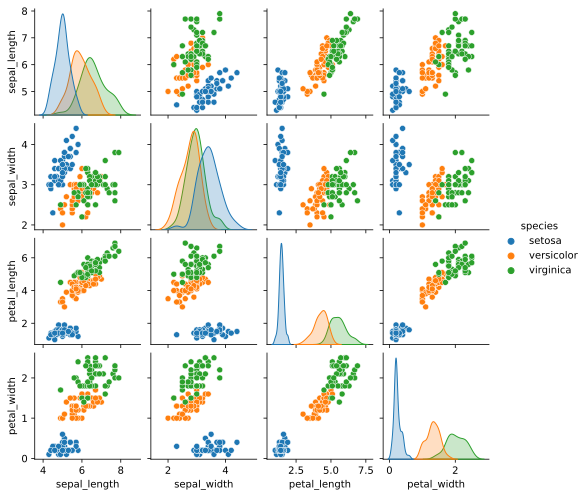

In [9]:
sns.pairplot(data = iris , hue = "species" ,height=1.75,
             aspect=1 )


## 3. Converting to tensor 

In [12]:
arr = iris[iris.columns[0:4]].values

#### Predictiors or Independent features

In [13]:
data = torch.tensor(arr ,dtype = torch.float )
data[:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

#### Labels

In [13]:
labels = np.zeros(shape = len(iris))

In [20]:
labels = torch.zeros(size = ( len(iris), )  ,dtype = torch.long)

In [21]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [22]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [23]:
labels[iris["species"] == "versicolor"] = 1

In [24]:
labels[iris["species"] == "virginica"]  = 2

    setosa       0
    versicolor   1
    virginica    2

In [26]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## 4. Create ANN Model

In [45]:
# output : are numbers (matrix order : no. of instances * no. of neurons in output layers)
# Predictions matrix : 150*3

def createANNirismodel(neuron , Lr):

    ANNiris = nn.Sequential(
                           # Input Layer  :  4 -inputs , 4 - Neurons , 4 -outputs
                           nn.Linear(4,neuron),
                           nn.ReLU(),
                        
                           # Output Layer :   3 - Neurons , 3 -outputs
                           nn.Linear(neuron,3)
                           )

    # Inbuilt - LogSoftMax(nn.LogSoftmax) function and 
    #           NegativeLogLikelihoodLoss(nn.NLLLoss) implementation

    # Useful when training a classification problem with `C` classes.
    lossfunc = nn.CrossEntropyLoss()

    # Optimzer 

    optimizer = torch.optim.SGD(params = ANNiris.parameters() , lr = Lr)
    
    return ANNiris,lossfunc,optimizer

## 5. Model Training

In [28]:
def ModelTraining(model ,lossfunc , optimizer,data ,labels , epochs ,):

    # loop over epochs
    for epochi in range(epochs):

        # forward pass
        yHat = model(data)

        # compute loss
        loss = lossfunc(yHat,labels)
        #losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = model(data)

    predlabels = torch.argmax(predictions,axis=1)
    
    
    total_acc = 100*torch.mean((predlabels == labels).float())
    
    return total_acc

## 6. Run the experiment!

In [46]:
numepochs  = 150
numhiddens = np.arange(1,120)
accuracies = []

for neurons in numhiddens:

    # create a fresh model instance
    ANNiris,lossfunc,optimizer = createANNirismodel(neuron = neurons , Lr = 0.01)

    # run the model
    acc = ModelTraining(model = ANNiris ,
                        lossfunc = lossfunc , 
                        optimizer = optimizer,
                        data = data ,labels = labels , epochs = numepochs ,)

    accuracies.append( acc )

In [37]:
accuracies

[tensor(33.3333),
 tensor(66.6667),
 tensor(38.),
 tensor(33.3333),
 tensor(33.3333),
 tensor(18.),
 tensor(72.),
 tensor(68.),
 tensor(69.3333),
 tensor(39.3333),
 tensor(70.),
 tensor(70.),
 tensor(74.),
 tensor(33.3333),
 tensor(66.6667),
 tensor(58.6667),
 tensor(66.6667),
 tensor(74.),
 tensor(70.),
 tensor(68.6667),
 tensor(66.6667),
 tensor(67.3333),
 tensor(66.6667),
 tensor(66.6667),
 tensor(71.3333),
 tensor(66.),
 tensor(66.6667),
 tensor(66.6667),
 tensor(66.6667),
 tensor(69.3333),
 tensor(85.3333),
 tensor(72.6667),
 tensor(68.6667),
 tensor(74.6667),
 tensor(68.6667),
 tensor(59.3333),
 tensor(72.6667),
 tensor(66.6667),
 tensor(69.3333),
 tensor(33.3333),
 tensor(80.),
 tensor(68.6667),
 tensor(66.6667),
 tensor(66.6667),
 tensor(66.6667),
 tensor(66.6667),
 tensor(81.3333),
 tensor(68.6667),
 tensor(80.6667),
 tensor(69.3333),
 tensor(74.),
 tensor(66.6667),
 tensor(86.6667),
 tensor(71.3333),
 tensor(33.3333),
 tensor(70.),
 tensor(87.3333),
 tensor(79.3333),
 tensor(

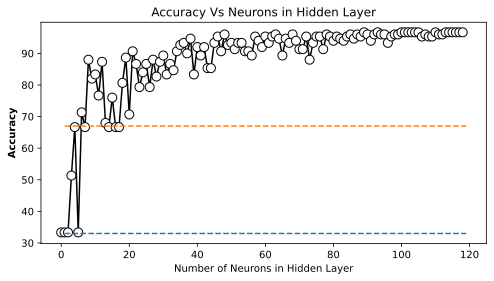

In [51]:
# report accuracy
fig,ax = plt.subplots(1,figsize=(8,4))

ax.plot(accuracies,'ko-',markerfacecolor='w',markersize=9)

ax.plot(numhiddens[[0,-1]],[33,33],'--',)
ax.plot(numhiddens[[0,-1]],[67,67],'--',)

ax.set_ylabel('Accuracy'  ,fontweight = "bold")
ax.set_xlabel('Number of Neurons in Hidden Layer')
ax.set_title('Accuracy Vs Neurons in Hidden Layer')
plt.show()
